## load the necessary libraries

In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt

## load a file

In [2]:
# file name
fn = "./out/example_0001_00000025.nc"
# load file
f = netcdf.netcdf_file(fn, 'r')

## species and index

In [3]:
# show aero_species
aero_species = f.variables['aero_species']
aero_species_ls = aero_species.names.decode().split(",")
aero_species_idx = aero_species.data
print("aerosol species list:", aero_species_ls)
print("aerosol species index:", aero_species_idx)

aerosol species list: ['SO4', 'NO3', 'Cl', 'NH4', 'MSA', 'ARO1', 'ARO2', 'ALK1', 'OLE1', 'API1', 'API2', 'LIM1', 'LIM2', 'CO3', 'Na', 'Ca', 'OIN', 'OC', 'BC', 'H2O']
aerosol species index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


## aerosol statistics

In [4]:
# number conc. of the population
num_conc_per_particle = f.variables["aero_num_conc"].data
print("number conc.:", num_conc_per_particle.sum())

# mass conc. of the population
mass_per_particle = f.variables["aero_particle_mass"].data.sum(axis=0)
print("mass conc.:", (mass_per_particle * num_conc_per_particle).sum())

# get particle volume and diameter
aero_density = f.variables["aero_density"].data.reshape(20,-1)
aero_particle_mass = f.variables["aero_particle_mass"].data 
aero_volume_per_particle = (aero_particle_mass/aero_density).sum(axis=0)
aero_diameter = np.cbrt(aero_volume_per_particle*6.0/np.pi)

number conc.: 3192796022.4433947
mass conc.: 9.938865086075722e-09


## number distribution

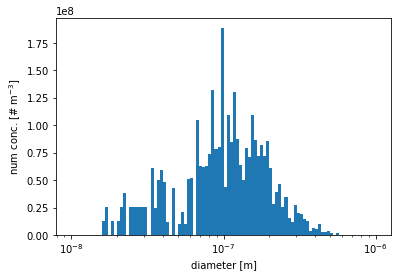

In [5]:
# setup the 111 bins ranged from 10^-8 to 10^-6
bins = np.logspace(-8,-6,5*20+1)
# plot the number distribution
plt.hist(aero_diameter, bins=bins, weights=num_conc_per_particle)
plt.xscale('log')
plt.xlabel('diameter [m]')
plt.ylabel(r'num conc. [# m$^{-3}$]')
plt.show()

## create a function and plot the time series

In [6]:
def get_num_conc(fn):
    with netcdf.netcdf_file(fn, 'r') as f:
        return f.variables["aero_num_conc"].data.sum()

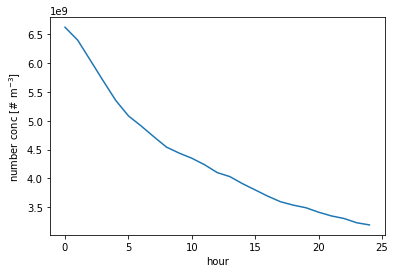

In [7]:
from glob import glob
fn_ls = sorted(glob('./out/example_*.nc'))

num_conc_ls = []
for fn in fn_ls:
    num_conc_ls.append(get_num_conc(fn))
    
plt.plot(num_conc_ls)
plt.xlabel("hour")
plt.ylabel(r"number conc [# m$^{-3}$]")
plt.show()